# Project: Investigate a Dataset  
## No-show appointments data  
<br>

## Name: Wooyoul Na  
## Date: 2021-03-24  
<br>  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<br>  
<br>  
### Brief description about dataset
<br>  
#### Brief introduction   
<br>  
> **No-show appointments**  
> <br>  
> **file name: `noshowappointments-kagglev2-may-2016.csv`**  
> <br>  
> **description** : This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.  
> <br>  
<br>  
#### the meanings about features   
<br>  
> The raw-data **originally** contains following features :  
> <br>  
> + **PatientId** : the unique keys for each patients  
> + **AppointmentID** : the unique keys for the appointment  	
> + **Gender** : the gender of patients(F/M)  
> + **ScheduledDay** : what day the patient set up their appointment
> + **AppointmentDay** : what day the patient actually have to go to the hospital  
> + **Age** : the age of patients  
> + **Neighbourhood** : the location of the hospital
> + **Scholarship** : whether or not the patient is enrolled in Brasilian welfare program Bolsa Família
> + **Hipertension** : the patients have hipertension or not  
> + **Diabetes** : the patients have diabetes or not 
> + **Alcoholism** : the patients have alcoholism or not
> + **Handcap**: the patients have handcap or not
> + **SMS_received** : whether the patients have received the SMS message or not
> + **No-show** : if the patient showed up to their appointment, the value is "No", and if the patient didn't show up to their appointment, the value is "Yes".  
> <br>  
> Additionaly, the following features have been **newly created** for this project :  
> <br>  
> + **duration** : the difference from the scheduled day to appointment day(unit: days)  
> + **no_prior_noshow_rate** : the proportion of the prior no-show appointment rate by each patient
<br>  


### Questions:  
<br>  
>  + **Q1**. Is there gender differences on whether the patients attending the appointment or not?  
> <br>  
>  + **Q2**. Is there any impact the patients' age on whether the patients attending the appointment or not?  
> <br>  
>  + **Q3**. is there any impacts whether the patient have received SMS messages or not on the patients attending the appointment or not?  
> <br>  
>  + **Q4**. Is there any impact the duration from scheduled day to appointment day on whether the patients attending the appointment or not?  
> <br>  
>  + **Q5**. Is there any impact the prior no-show rate of the patients on whether the patients attending the appointment or not?  
> <br>  

In [1]:
## import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

> + In this section,  following tasks have been processed to investigate about the dataset.  
>   + (1) Data loading  
>   + (2) Glance a first few lines of the data  
>   + (3) View the shape of the data
>   + (4) View the column names of the data
>   + (5) Check the types of values in each columns  
>   + (6) Check whether any invalid records have been contained in the data
>   + (7) Check whether any missing values have been contained in the data
>   + (8) Check whether any duplicated rows have been contained in the data


#### (1) Data loading: no-show data

In [2]:
## data loading: no-show data
noshow_dt = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#### (2) Glance a few lines of the data

In [3]:
## print out a few lines
noshow_dt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### (3) The shape of the data

In [4]:
## shape of no-show data
noshow_dt.shape

(110527, 14)

> + the raw data contains 110,527 rows and 14 columns

#### (4) The column names in the raw data

In [5]:
## column names in the data
noshow_dt.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

#### (5) The types of values in each columns

In [6]:
## dtypes for columns: .info()
noshow_dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### (6) Check whether any invalid records have been contained in the data

In [7]:
## 1. summary statistics for continuous features except ID columns in the raw-data
noshow_dt.iloc[:,2:].describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
## 2. unique values for each features except ID columns
for feature in noshow_dt.columns[2:]:
    print(str(feature)+": "+ str(noshow_dt[feature].unique()))

Gender: ['F' 'M']
ScheduledDay: ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay: ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
Age: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11 

In [9]:
## 3. chech the number of cases which are negative age
print("Negative Age: "+str(len(noshow_dt.query('Age<0'))))

Negative Age: 1


In [10]:
## 4. Check whether any cases 
## which the scheduled date are after the appointment date have been contained in the data

invalid_date = pd.to_datetime(noshow_dt['ScheduledDay']).dt.date > pd.to_datetime(noshow_dt['AppointmentDay']).dt.date

print("scheduled day > appointment day: "+str(invalid_date.sum()))

scheduled day > appointment day: 5


> + As we can see, There are some invalid values in the raw-data.  
> <br>  
> + For example, **1 case** which is **negative age(Age<0)** could be seen as invalid.  
> <br>  
> + Also, **5 cases** which **scheduled days were after appointment days** were contained in the raw data.  
> <br>  
> + These cases could be seen as invalid because it is non-logical case that scheduled days are after appointment days.  

#### (7) Check whether the missing values have been contained in the raw data

In [11]:
### check about missing values
noshow_dt.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> + There is **no missing values** in the raw data.  
> <br>  


#### (8) Check whether the duplicated rows have been contained in the raw data

In [12]:
## confirm duplicated rows
print("completely duplicated: "+str(noshow_dt.duplicated().sum())+"\n"+
     "duplicated PatientId * AppointmentID: "+str(noshow_dt.duplicated(['PatientId','AppointmentID']).sum())+"\n"+
     "unique PatientId: "+str(len(noshow_dt['PatientId'].unique())))

completely duplicated: 0
duplicated PatientId * AppointmentID: 0
unique PatientId: 62299


> + The raw data has not contains any duplicated rows  
> <br>  
> + But, the number of unique `PatientId`s is smaller than the number of rows. Therefore, it can be seen as there are recorded more than one appointment for one patient in the data.  
> <br>  
> + Although it's not abnormal to record more than one appointment for one patient in the data, but it could be considered while proceed data cleaning.  
> <br>  
> + For example, it can be created the new feature which means the number of prior appointments by one patients.  
> <br>

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

> After glancing the raw-data, I think that the following tasks would be needed.
> <br>  
> <br>  
> + **(1) Convert the dtypes of some features**  
>  + `ScheduledDay`, `AppointmentDay` : from string to datetime  
> <br>  
> + **(2) Delete some rows which contains invalid values**  
>  + the cases which **negative age** could be invalid.  
>  + the cases which **scheduled dates were after the appointment dates** could be invalid.  
> <br>  
> + **(3) Create some additional features**   
>  + `duration`: the duration from the appointment day to scheduled day  
>  + `no_prior_noshow_rate`: the rate of prior no-show appointments by each patients  
> <br>  

#### (1) Convert the dtypes of some features

In [13]:
## convert to datetime: ScheduledDay
noshow_dt['ScheduledDay'] = pd.to_datetime(noshow_dt['ScheduledDay']).dt.date

## convert to datetime: AppointmentDay
noshow_dt['AppointmentDay'] = pd.to_datetime(noshow_dt['AppointmentDay']).dt.date

## check the result
print("type of Scheduled Day: " + str(type(noshow_dt['ScheduledDay'][0])))
print("type of Appointment Day: " + str(type(noshow_dt['AppointmentDay'][0])))

type of Scheduled Day: <class 'datetime.date'>
type of Appointment Day: <class 'datetime.date'>


#### (2) Delete some rows which contains invalid values

In [14]:
## check the number of invalid age
len(noshow_dt.query('Age < 0'))

1

In [15]:
## Delete case which is invalid age
print("the number of cases after deleting invalid age: "+str(len(noshow_dt.query('Age >= 0'))))
noshow_dt = noshow_dt.query('Age >= 0')
noshow_dt.head()

the number of cases after deleting invalid age: 110526


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
## Delete cases which are ScheduledDay > AppointmentDay
print("the number of cases after deleting invalid scheduled day: "+str(len(noshow_dt.query("AppointmentDay >= ScheduledDay"))))
noshow_dt = noshow_dt.query("AppointmentDay >= ScheduledDay")
noshow_dt.head()

the number of cases after deleting invalid scheduled day: 110521


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### (3) Create some additional features   

> + First, the new feature `duration` could be created by `AppointmentDay`-`ScheduledDay`.  
<br>  

In [17]:
## additional feature 1: duration
noshow_dt['duration'] = noshow_dt['AppointmentDay']-noshow_dt['ScheduledDay']
### change the type of 'duration' to numeric
noshow_dt['duration'] = noshow_dt['duration'].astype(str).str[0:3].str.replace("d","").astype(int)

noshow_dt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,duration
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


> + Second, the new feature `no_prior_noshow_rate` could be created using the prior no-show experiences of each patients.  

In [18]:
## additional feature 2: no_prior_noshow_rate

### convert value type of PatientId to string
noshow_dt['PatientId'] = noshow_dt['PatientId'].astype(np.int64).astype(str)

### add 'noshow_num' column: if 'No-show'=='Yes' noshow_num = 1, else noshow_num = 0
noshow_num = {'Yes': 1, 'No': 0}
noshow_dt['noshow_num'] = noshow_dt['No-show'].replace(noshow_num)
noshow_dt.head(10)

### sort noshow_dt
noshow_dt_sort = noshow_dt.sort_values(['PatientId','ScheduledDay'])


In [19]:
### create the no. of prior no-show rate

#### step 1. calculate cumulative sum of no-show and cumulative count groupby PatientId
noshow_dt_sort['cumsum_col'] = noshow_dt_sort.groupby(['PatientId'])['noshow_num'].cumsum()
noshow_dt_sort['cumcount_col'] = noshow_dt_sort.groupby(['PatientId']).cumcount()+1

####### check whether calculation did well

##### row-index which the cumulative no-show is more than 1
ind = noshow_dt_sort.groupby(['PatientId'])['noshow_num'].cumsum() >= 2

##### glance the PatientIds which were corresponded the condition 
print(noshow_dt_sort[ind]['PatientId'])

##### check the data: in the case of PatientId=='112873513999765'
noshow_dt_sort.query("PatientId=='112873513999765'").loc[:,['PatientId','ScheduledDay','cumsum_col','cumcount_col']]

103284    111415561531417
105717    111415561531417
108755     11163631268489
109197     11163631268489
88388      11163631268489
99256      11185168812884
90243      11198934419925
110232    112114682124172
21351       1122443646527
4286        1122443646527
4981        1124221426471
39548       1124221426471
64599       1124221426471
4953        1124221426471
74508       1124221426471
5031        1128289566636
13058       1128289566636
27107     112873513999765
36650     112873513999765
36700     112873513999765
39942     112873513999765
106907      1131772254775
42493     113349441268785
42520     113349441268785
64358     113875872765418
64359     113875872765418
92867     113875872765418
84926     113952483828156
100138    113952483828156
1557        1144471549922
               ...       
52051       9983377194718
37966      99857896393914
32856     998695728115913
57534     998695728115913
66248      99871477366383
66216      99871477366383
66219      99871477366383
66243      9

,PatientId,ScheduledDay,cumsum_col,cumcount_col
102959,112873513999765,2016-03-17,1,1
27107,112873513999765,2016-04-07,2,2
36650,112873513999765,2016-04-27,3,3
36700,112873513999765,2016-05-03,3,4
39942,112873513999765,2016-05-30,3,5


> + As we can see, the patient '112873513999765' have three-times 'no-show appointment'.  
> <br>  
> + Now, the new feature `no_prior_noshow_rate` could be created by `cumsum_col`/`cumcount_col`. 
> <br> 

In [20]:
#### step 2. calculate no. of prior no-show rate by PatientIds
noshow_dt_sort['no_prior_noshow_rate'] = noshow_dt_sort['cumsum_col']/ noshow_dt_sort['cumcount_col']

###### check the data: in the case of PatientId=='112873513999765'
noshow_dt_sort.query("PatientId=='112873513999765'").loc[:,['PatientId','ScheduledDay','cumsum_col','cumcount_col','no_prior_noshow_rate']]

,PatientId,ScheduledDay,cumsum_col,cumcount_col,no_prior_noshow_rate
102959,112873513999765,2016-03-17,1,1,1.00
27107,112873513999765,2016-04-07,2,2,1.00
36650,112873513999765,2016-04-27,3,3,1.00
36700,112873513999765,2016-05-03,3,4,0.75
39942,112873513999765,2016-05-30,3,5,0.60


> + As we can see, the `no_prior_noshow_rate` feature has been created well.  
<br>  
> + Finally, We'll finalize the cleaned data to assign to the new object named `noshow_dt_fin`.  
<br>  

In [116]:
#### Finalize

##### sort by row-index and drop useless columns
noshow_dt_fin = noshow_dt_sort.sort_index().drop(['cumsum_col','cumcount_col'],axis=1)

### check the shape of cleaned data
print(noshow_dt_fin.shape)

### glance the first a few rows of cleaned data
noshow_dt_fin.head()

### save to csv file
noshow_dt_fin.to_csv('noshowappointments-kagglev2-may-2016_cleaned.csv')

(110521, 17)


<a id='eda'></a>
## Exploratory Data Analysis
<br> 
<br>  
### Q1. Is there gender differences on whether the patients attending the appointment or not?

No-show  Gender
No       F         57245
         M         30962
Yes      F         14591
         M          7723
Name: Gender, dtype: int64
No-show  Gender
No       F         0.648985
         M         0.351015
Yes      F         0.653894
         M         0.346106
Name: Gender, dtype: float64


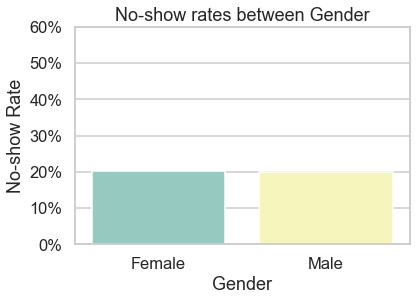

In [22]:
## Frequency of Gender for No-show group
print(noshow_dt_fin.groupby('No-show')['Gender'].value_counts())

## Proportion of Gender for No-show group
print(noshow_dt_fin.groupby('No-show')['Gender'].value_counts(normalize=True))

## plotting gender difference about no-show
sns.set_style('whitegrid')
sns.set_context('talk')
plot1 = sns.barplot(x='Gender',y='noshow_num', data=noshow_dt_fin, palette='Set3',ci=None)
plt.title("No-show rates between Gender")
plot1.set(ylabel="No-show Rate",ylim=(0,0.6),xticklabels=['Female','Male'],yticklabels=['0%','10%','20%','30%','40%','50%','60%'])
plt.show()

> + As we can see above, It seems like that there is few difference on patients' no-show rate between gender.

###  Q2. Is there any impact the patients' age on whether the patients attending the appointment or not?

              mean        std  median  min  max
No-show                                        
No       37.790504  23.338645      38    0  115
Yes      34.317872  21.965009      33    0  115


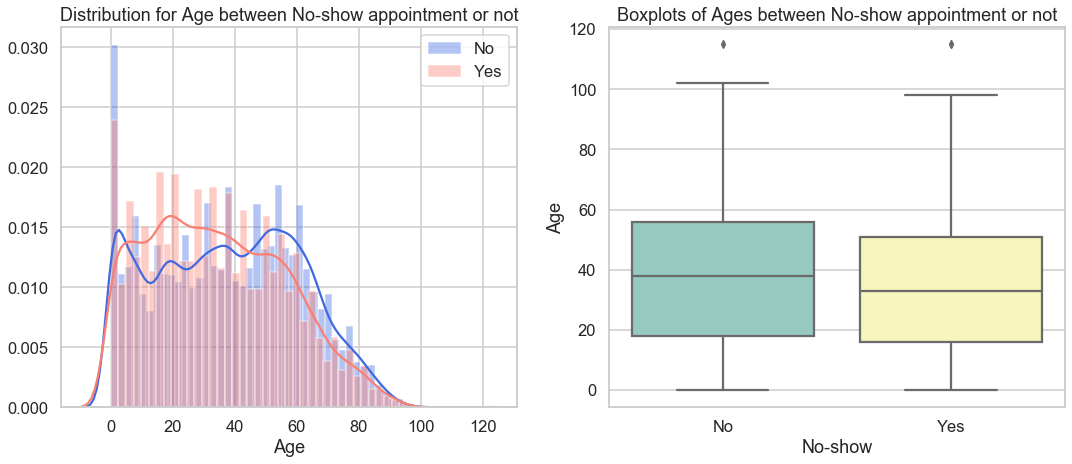

In [94]:
### descriptive statistics for Ages by No-show appointment or not
print(noshow_dt_fin.groupby('No-show')['Age'].agg([np.mean,np.std,np.median, min, max]))

### setting subplot: 1*2
fig, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,7)

### plotting histogram
sns.set_style('whitegrid')
sns.set_context('talk')
sns.distplot(noshow_dt_fin[noshow_dt_fin['No-show']=='No']['Age'],color="royalblue",ax=ax1)
sns.distplot(noshow_dt_fin[noshow_dt_fin['No-show']=='Yes']['Age'],color="salmon",ax=ax1)
ax1.set(title='Distribution for Age between No-show appointment or not')
ax1.legend(['No','Yes'])

### plotting boxplot
plot2 = sns.boxplot(x='No-show',y='Age',data=noshow_dt_fin,orient='v',palette="Set3",ax=ax2)
plt.title("Boxplots of Ages between No-show appointment or not")
plot2.set(ylabel="Age",xticklabels=['No','Yes'])
plt.show()

> + In the case of Age, It is slightly different between No-show appointment patients and not.  
> <br>  
> + It seems likely that No-show appointment patients may be younger than patients who attend the appointment, but it's not a large difference.  
> <br>  
> + The distribution for age of patients who attend the appointment is seems like bimodal.  
> <br>  

### Q3. is there any impacts whether the patient have received SMS messages or not on the patients attending the appointment or not?

SMS_received
0    0.166980
1    0.275745
Name: noshow_num, dtype: float64


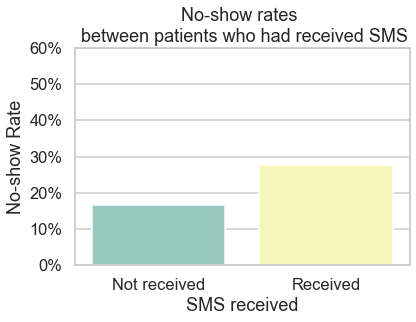

In [95]:
## No-show rates between patients who had been received the SMS messages or not
print(noshow_dt_fin.groupby('SMS_received')['noshow_num'].agg(np.mean))

## plotting no-show rates between patients who had been received the SMS messages or not
plot3 = sns.barplot(x='SMS_received',y='noshow_num',data=noshow_dt_fin,ci=None,palette="Set3")
plt.title("No-show rates \n between patients who had received SMS")
plot3.set(xlabel="SMS received",ylabel="No-show Rate",ylim=(0,0.6),xticklabels=['Not received','Received'],yticklabels=['0%','10%','20%','30%','40%','50%','60%'])
plt.show()

> + It seems like that the patients who have received SMS messages could have done more likely the No-show appointment than the patients who have not received SMS.  
> <br>  

### Q4. Is there any impact the duration from scheduled day to appointment day on whether the patients attending the appointment or not?

              mean       std  median  min  max
No-show                                       
No        8.754759  14.55045       2    0  179
Yes      15.835484  16.60560      11    0  179


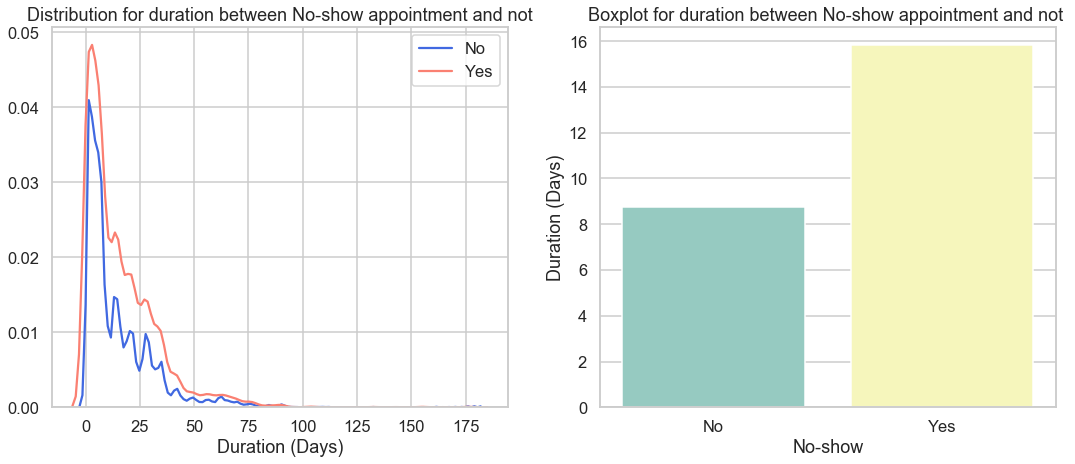

In [104]:
### Descript statistics
print(noshow_dt_fin.groupby('No-show')['duration'].agg([np.mean,np.std,np.median,min,max]))

### setting subplot: 1*2
fig, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,7)

### density plot
sns.set_style('whitegrid')
sns.set_context('talk')
q4_1 = sns.distplot(noshow_dt_fin[noshow_dt_fin['No-show']=='No']['duration'],hist=False,color="royalblue",label="No",ax=ax1)
q4_2 = sns.distplot(noshow_dt_fin[noshow_dt_fin['No-show']=='Yes']['duration'],hist=False,color="salmon",label="Yes",ax=ax1)
ax1.set(xlabel="Duration (Days)",title="Distribution for duration between No-show appointment and not")
## bar
sns.barplot(data=noshow_dt_fin,x='No-show',y='duration',ax=ax2,palette="Set3",ci=None)
ax2.set(ylabel="Duration (Days)",title="Boxplot for duration between No-show appointment and not ")
plt.show()

> + It seems likely different for durations between patients who have had no-show appointment and not.
> <br>
> + Patients who are more likely to make a no-show appointment tend to more difference from the scheduled day to appointment day.  
> <br>


###  Q5. Is there any impact the prior no-show rate of the patients on whether the patients attending the appointment or not?

No-show
No     0.054393
Yes    0.832700
Name: no_prior_noshow_rate, dtype: float64


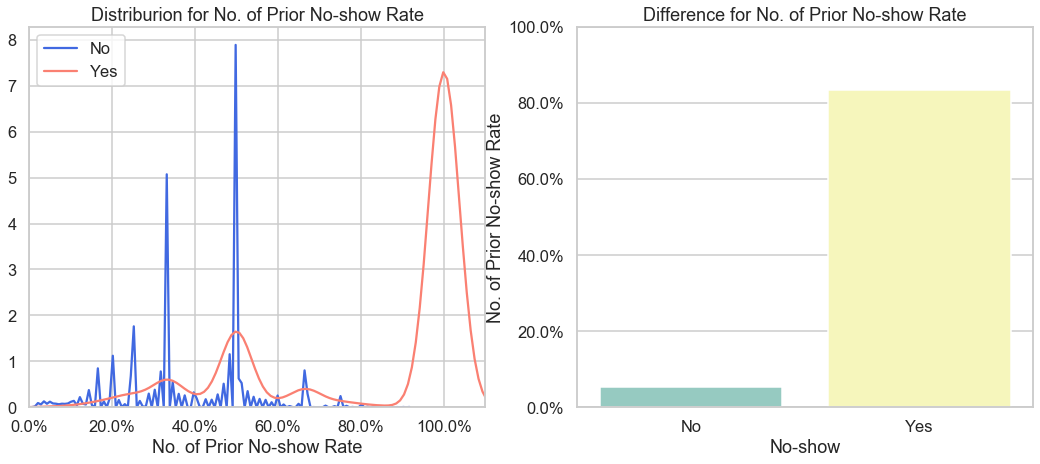

In [115]:
### descriptive statistics
print(noshow_dt_fin.groupby('No-show')['no_prior_noshow_rate'].agg(np.mean))

### setting subplot: 1*2
fig, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,7)

sns.distplot(noshow_dt_fin[noshow_dt_fin['No-show']=='No']['no_prior_noshow_rate'],hist=False,color="royalblue",label="No",ax=ax1)
sns.distplot(noshow_dt_fin[noshow_dt_fin['No-show']=='Yes']['no_prior_noshow_rate'],hist=False,color="salmon",label="Yes",ax=ax1)
ax1.set(xlabel="No. of Prior No-show Rate",title="Distriburion for No. of Prior No-show Rate",
       xlim=[0,1.1],
        xticklabels=['0.0%','20.0%','40.0%','60.0%','80.0%','100.0%'])

sns.barplot(x='No-show',y='no_prior_noshow_rate',data=noshow_dt_fin,palette="Set3",ci=None,ax=ax2)
ax2.set(ylabel="No. of Prior No-show Rate",title="Difference for No. of Prior No-show Rate",
       ylim=[0,1],
        yticklabels=['0.0%','20.0%','40.0%','60.0%','80.0%','100.0%'])
plt.show()

> + It seems likely that the the more the patients have experienced previously making no-show appointments, the more likely they are to make no-show appointments.  
> <br>  
> + the "prior no-show rate" could be very important feature for predicting no-show appointments.  
> <br>  

<a id='conclusions'></a>
## Conclusions

> Some conclusions after investigate the no-show appointments data could be presented following:  
> <br>   
> + Q1. Is there gender differences on whether the patients attending the appointment or not?   
>   + As we can see above, There is few difference on patients' no-show rate between gender. So, the gender of the patients is hard to see as an important feature for predicting no-show appointments.    
> <br>  
> + Q2. Is there any impact the patients' age on whether the patients attending the appointment or not?  
>   + Because There is just "very slightly" different to age between the patients who make No-show appointment patients and not, the age of patients is hard to see as an important feature for predicting no-show appointments, too.   
> <br>   
> + Q3. is there any impacts whether the patient have received SMS messages or not on the patients attending the appointment or not?   
>   + It seems like that the patients who have received SMS messages could have done more likely the No-show appointment than the patients who have not received SMS.  
>   + However, since this conclusion may be difficult to accept in common sense, additional data collection may be required to explore more accurate relationships between SMS reception and no-show appointments.  
> <br>  
> + Q4. Is there any impact the duration from scheduled day to appointment day on whether the patients attending the appointment or not?  
>   + the duration, which means the difference from scheduled day to appointment day, could be considered as one of the important features for predicting the no-show appointments.
>   + Patients who are more likely to make a no-show appointment tend to more difference from the scheduled day to appointment day.  
> <br>  
> + Q5. Is there any impact the prior no-show rate of the patients on whether the patients attending the appointment or not?    
>   + From the results of the investigation, the prior no-show rate of the patients could be an important feature for predicting the no-show appointments.  
> <br>  
